In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Air_Quality.csv')
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,01/01/2015,1.2,NaN
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,Annual Average 2012,12/01/2011,8.6,NaN
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Annual Average 2012,12/01/2011,8.0,NaN
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,Summer 2022,06/01/2022,6.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN


In [11]:
data.dtypes

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID       float64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object

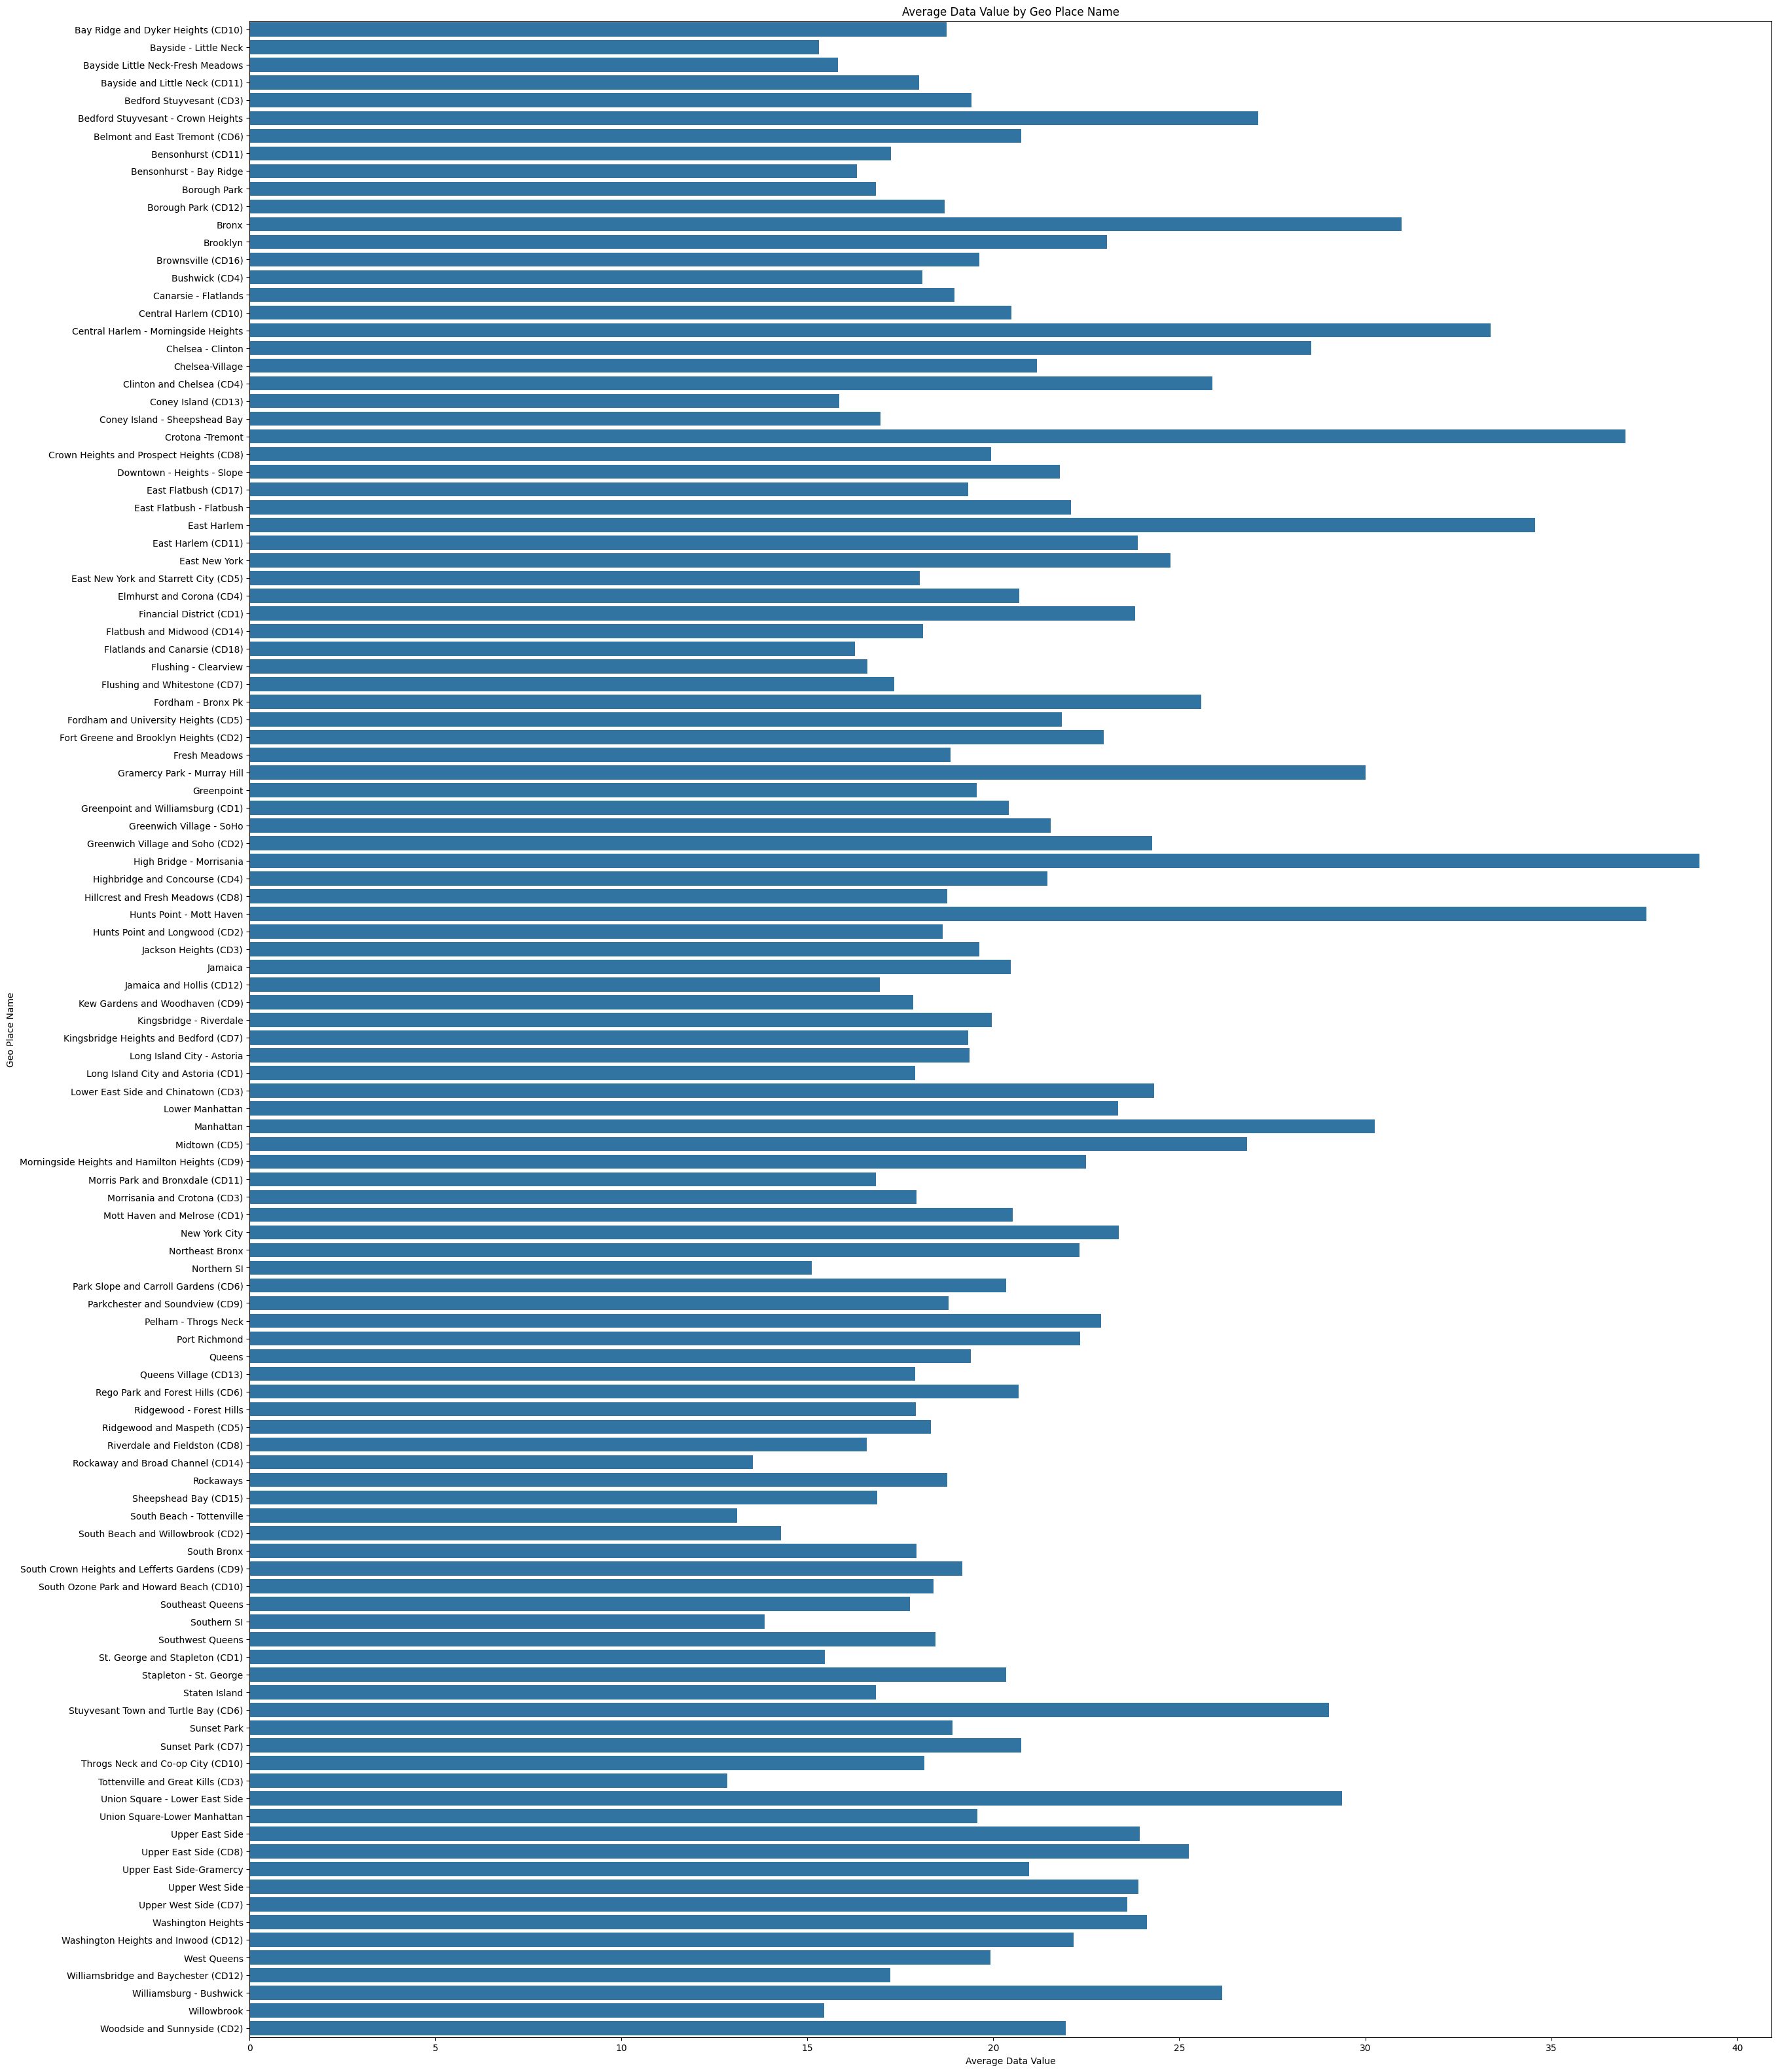

In [13]:
plt.figure(figsize=(30, 40))
average_data_value = df.groupby('Geo Place Name')['Data Value'].mean().reset_index()
sns.barplot(x='Data Value', y='Geo Place Name', data=average_data_value)
plt.title('Average Data Value by Geo Place Name')
plt.xlabel('Average Data Value')
plt.ylabel('Geo Place Name')
plt.show()

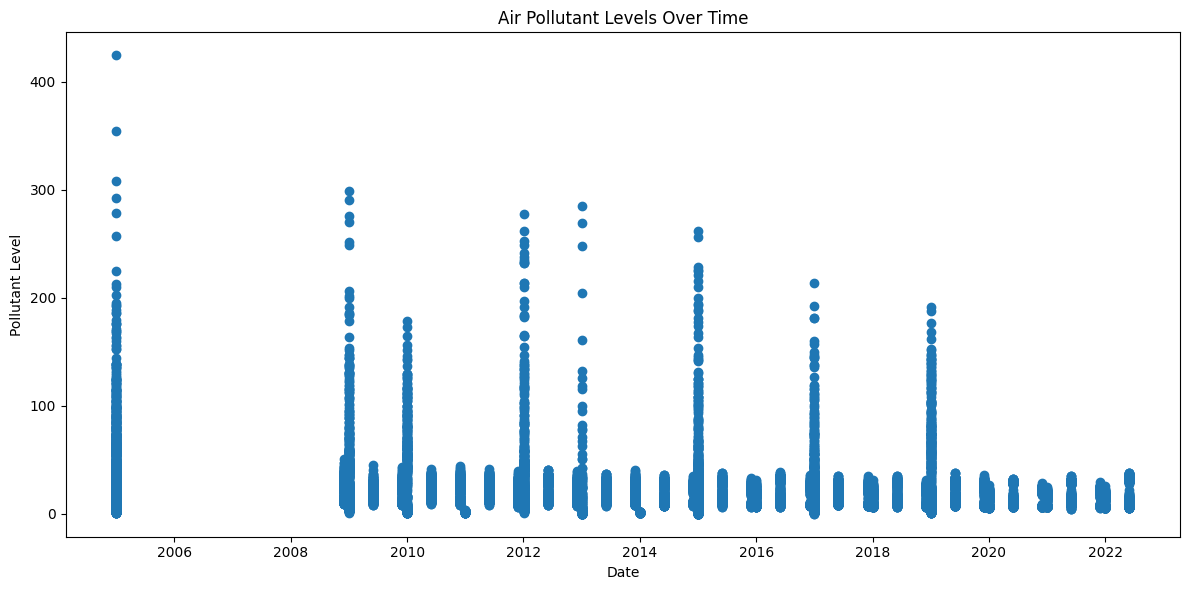

In [14]:
# Convert Start_Date to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

# Create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(df['Start_Date'], df['Data Value'])
plt.title('Air Pollutant Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.tight_layout()
plt.show()

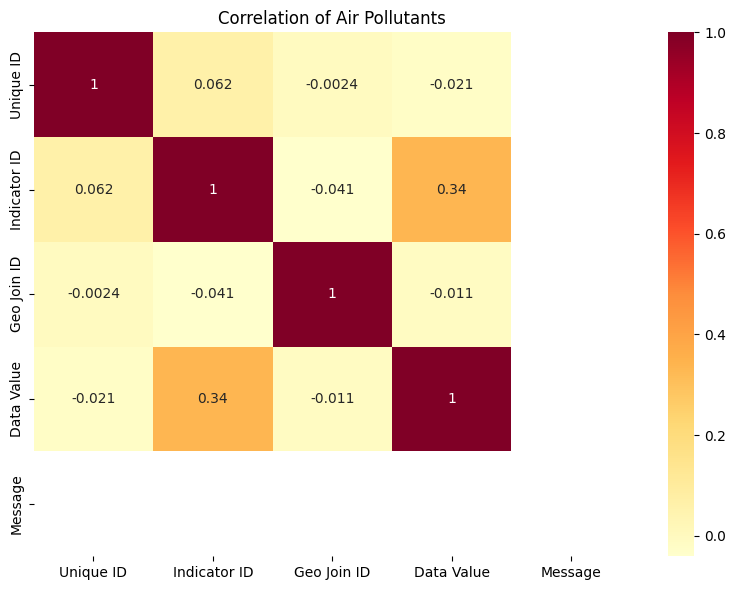

In [15]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation of Air Pollutants')
plt.tight_layout()
plt.show()

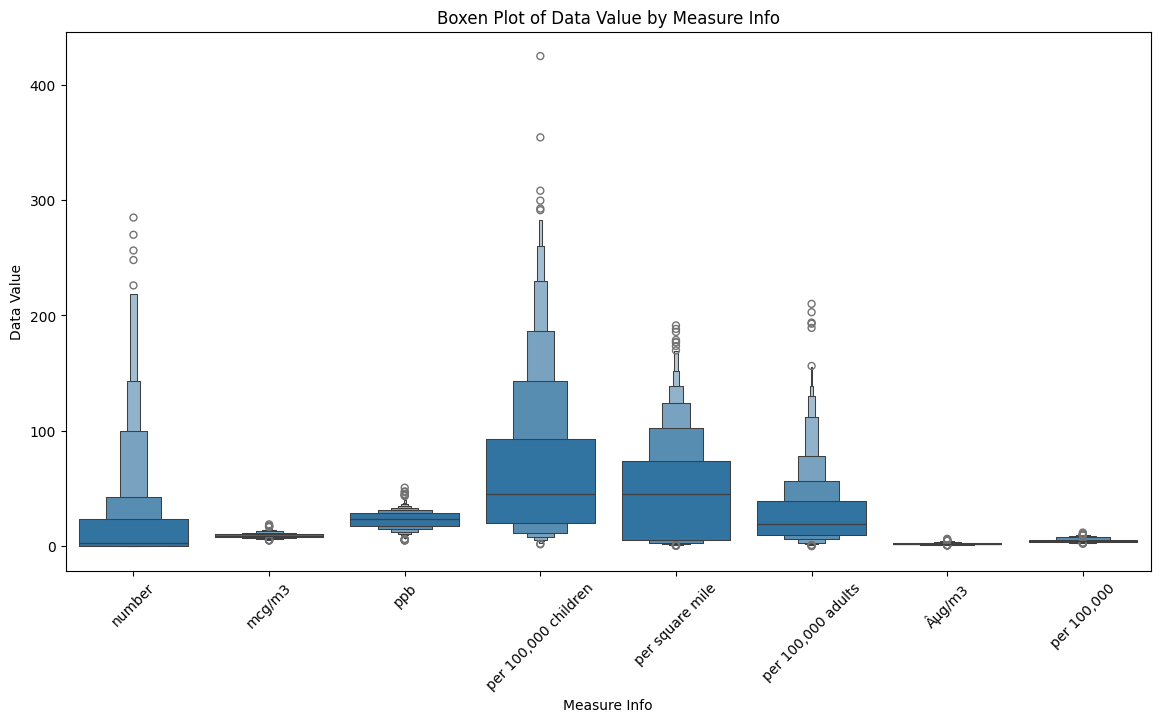

In [18]:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='Measure Info', y='Data Value', data=df)
plt.title('Boxen Plot of Data Value by Measure Info')
plt.xlabel('Measure Info')
plt.ylabel('Data Value')
plt.xticks(rotation=45)
plt.show()

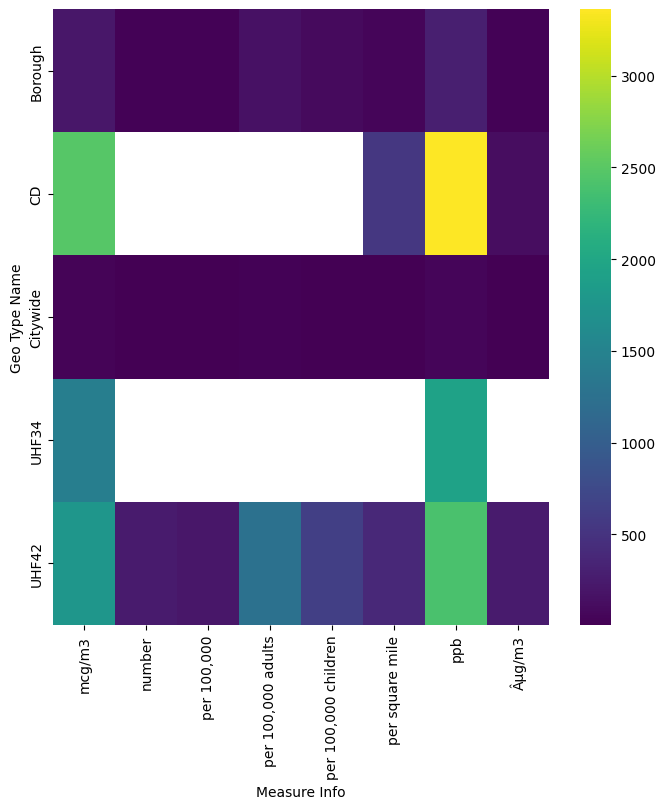

In [17]:
# @title Measure Info vs Geo Type Name
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Geo Type Name'].value_counts()
    for x_label, grp in df.groupby('Measure Info')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Measure Info')
_ = plt.ylabel('Geo Type Name')